<a href="https://colab.research.google.com/github/SWEN90006/tutorial-solutions-private/blob/main/SWEN90006_Tutorial_6_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWEN90006 Tutorial 6 solutions

## Task 1
Standard analysis: Determine the input/output domains and the
input/output conditions (if any).

### First Program

We view the program as a function, or a relation between
inputs and outputs thus:

$$toLower~:~Input~Domain \rightarrow Output~Domain$$

The specification gives us some of the information, but we also use
the code itself to determine this. The program ignores the
command-line arguments and uses a parameter to read in a string of at most
80 characters from the input.

Consequently, the input domain is the set of all strings:

$$Input = char \verb+[]+$$ 

or the set of strings that contain 80 characters or less, because call to `subString` restricts the size to 80:

$$Input_{80} = \{ s : char \verb+[]+ \mid \#s \leq 80\}$$

The output domain for the program is the same.

Why would we choose to test all strings rather than just strings of
length less than or equal to 80? Put another way, why might we want to
use Input instead of $Input_{80}$? The reason is that we would
want to test strings of arbitrary length to ensure that toLower
handled strings of different lengths properly -- see the input
conditions below -- and this gives us a better testing range.

The input condition is that for any $s\in Input$ and for any

$0\leq i < s.length \leq 80$ $$  ascii(s[i]) \geq 32 \land ascii(s[i]) \leq 126.$$

The output condition is that for any $ s\in Output$ and for any
$0\leq i < s.length \leq 80$

$$32 \leq ascii(s[i]) \leq 64 ~\lor~ 91 \leq ascii(s[i]) \leq 126$$

### Second Program

We've seen this example before in tutorial 3 so we already
know its input and output domains. In case you've forgotten, here they
are again.

The function Bisection uses no other inputs other than those coming
from the parameters so we can describe the program in terms of a
function $Bisection\,:\,Input\rightarrow Output$ as:
$$Bisection\,:\, double \times double \times double \times int
  \rightarrow double$$ The input domain is consequently $double
  \times double \times double \times int$ if we ignore the function
parameter. However, the mathematical function f() should also be considered
as part of the input domain, as we discussed in tutorial 3.


## Task 2

Use the specification, domains and conditions to write a test oracle that determines if an arbitrary test input is correct, incorrect or otherwise

### First Program
The way to design an oracle is to begin by looking at the
ways in which the program can fail. To understand how the program can
fail you need to examine the specifications for the program, the input
conditions and the output conditions. We also use the failure taxonomy
from the lecture notes.

Here are some ideas:

1.  It can return an error on a valid input;

2.  It can return a valid output on an invalid input;

3.  It can return a string with an upper case character in the output
    thus violating the output condition; or

4.  It can insert upper cases characters instead of removing them,
    thus violating the output condition.

5.  It can return a string that is all lower case by removing the
    upper case characters instead of substituting them.

6.  It can substitute the wrong lower-case character for the
    upper-case character.

Now, the next step is to think about how we can detect each of the
failures listed above. That is, how can we implement this?

One way is to check that each ascii character in the output is between
32 and 64, or between 91 and 126, as specified by the output
condition. But this is not complete, as it does not check point 5
above, for example. To check point 5, we could check that the length
of the input and the length of the output are equivalent.

Checking points 2 and 6 is also difficult. Check point 6 can be
checked by iterating over the list and checking that upper case
character in the input is 32 ascii characters from the character in
the output. Point 2 can be checked by iterating over the characters
and seeing if any fall outside of the legal character set.

However, we can see that the oracle is already becoming as complex as
the program itself. One thing we should aim for with a test oracle is
simplicity: we want the test oracle to be correct, so making it as
complex as the program itself means that it will not serve well as an
oracle.

Instead, the best we can do is implement a *partial* oracle: one that
checks only some of the output properties, or works on only a subset
of the input domain. In this case, we choose to check that the output
is in the output domain, and that the length of the input and output
are the same (checking point 5 above), and that all input characters
are valid.

Let Input be the set from the input condition. Then we have the
following: 


        if Test in Input then
            return toLower(Test) in Output and size(Test) = size(toLower(Test))
        else if string[i] not in Input for some i then
            toLower(Test) returns "Illegal character found"


Can we do better? How many different kinds of failures from the list
above does this oracle detect? Does it distinguish between them?

### Second Program

The next question is "*How can the Bisection function fail*"? Here are
some ideas:

-   If Bisection returns a value that is not between Lower and 
    Upper, this indicates a clear failure of the program. 

-   If there is a root between Lower and Upper and Bisection returns 
    a value that is not within the error margin of the actual root.

An oracle based on the first idea is simple to implement -- we only 
    need to check if the result given by the prgram is between 
    Lower and Upper: 

        result = Bisection(lower, upper, error, iMax, f);

        if (result < lower || result > upper) 
            return FAILURE;
        else
            return SUCCESS;

We also want to design an oracle for the second case above. One possible
idea is, we check if there is at least one root point within the error
margin (between `result * (1 - error / 100)` and `result * (1 + error / 100)`). 
While finding an exact root point may require us to implement another 
root-finding algorithm (which could be essentially as complex as Bisection),
we may rely on the sign of the value `f(x)` to decide whether there must 
be at least one root point within the given range. Evaluating the sign of 
`f(result * (1 - error / 100))` and `f(result * (1 + error / 100))` may lead 
to the following scenarios:

-   At least one of `f(result * (1 - error / 100))` and 
    `f(result * (1 + error / 100))` equals to zero. Apparently we 
    found a root point within the error margin.

-   `f(result * (1 - error / 100))` and `f(result * (1 + error / 100))`
    have different signs. Since the function is continuous, there must
    be at least one root point within this range. 

-   `f(result * (1 - error / 100))` and `f(result * (1 + error / 100))`
    share the same sign. This may be a non-trivial case. Consider the 
    following input: function `f(x) = x^2 - 420x + 44096`, `lower=202`, 
    `upper=210`, `error=5` (5% error margin allowed). The program will 
    return 206 as the result. In this case, 
    `f(result * (1 - error / 100)) = f(195.7) > 0` and 
    `f(result * (1 + error / 100)) = f(216.3) > 0`, thus it may be
    non-trivial for us to tell if there is a root point in between 
    (as we need an approach works for an arbitrary mathematical 
    function, within an arbitrary range on x-axis). 

    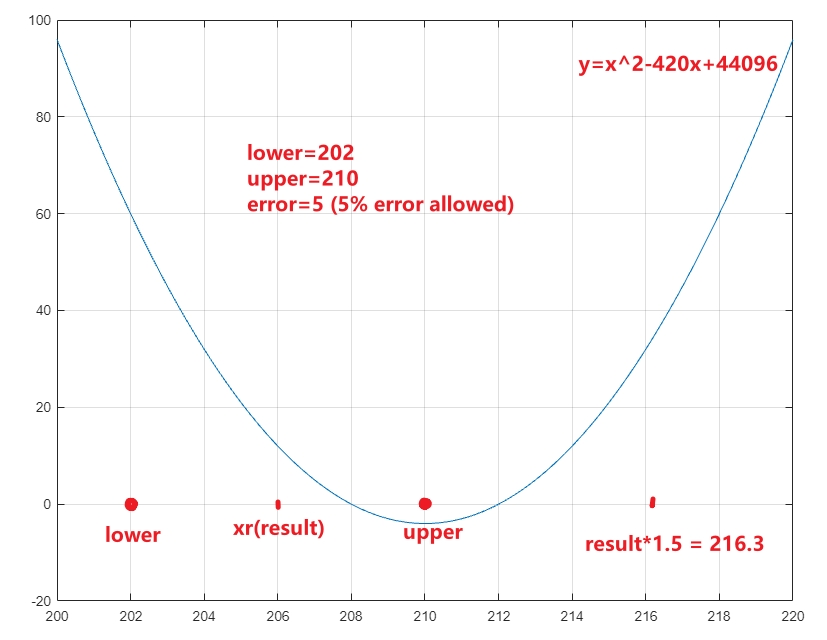

Thus our oracle could be implemented as:

        double result = Bisection(lower, upper, error, iMax, f);

        if (f(result - (1 - error / 100)) * f(result - (1 + error / 100)) <= 0) 
            return SUCCESS;
        else
            return UNDECIDABLE;

However, we did not consider the cases in which the program reaches
the maximum number iterations and exits before finding the root of the
function. It is problems such as these that make automated test
oracles difficult to derive. This problem is particularly difficult
because our specification is incomplete! It does not say what the
output should be in this case. Can we improve our test oracle to work
around this problem if we assume what the behaviour should be?




## Task 3
Determine an automated means for generating random test cases by selection points from the input set.

### First Program

Given we do not know anything about the distribution of inputs, we simply generate random strings. To do this, we would randomly select parameters based on:

-   The length of a string; and

-   The characters in the string.

So, randomly select the length of a string, and then, for each
character in the string, randomly generate a value between 0 and 127
(the set of ASCII characters). This number can be type-cast to
characters.

However, one would expect that users would mostly pass input to the
program that will not generate an error. We could estimate the
distribution of this. For example, consider that users would
generate a string of less than 80 characters approximately 95% of the
time, and would generate strings with valid characters 90% of the
time. Our distribution would consist of:

|  Input                     |  Probability |
|-----------------------------------|-------------------|
| #string $\leq$ 80   | 95%              |
| #string $>$ 80     | 5%               |
| $\forall i$ $\bullet$  ascii(string[i]) $\geq$ 32 $\land$  string[i] $\neq$ NULL | 90%              |
| $\exists i$ $\bullet$  ascii(string[i]) $<$ 32 $\lor$  string[i] $=$ NULL    | 10%              |

So, we generate a string with up to 80 characters in 95% percent of generated inputs and a string longer than 80 characters in 5%. Independently of length, we introduce at least one invalid character in 10% of inputs; otherwise all characters are valid. 

We may even wish to break
the distribution into cases based on how many invalid
characters are in the string.

### Second Program
Generating test cases for this program is certainly
non-trivial. The largest problem is generating random functions to
pass to the program. The most sensible way to get around this is to
pre-define a set of functions that can be used, and randomly select
from this set.

The second problem is knowing which values to choose for `Lower` and
`Upper`. That is, we want to choose values such that the root falls
between them; or at least, we would expect that, this is what most 
users would want. If we know which functions will be passed to the 
`bisection` program in advance (which we have assumed above) then 
this becomes less of a problem, because we can calculate the root of 
the function (or even an estimate of the root), and select values of 
`Lower` and `Upper` that are either side of these.

Given an estimate of the root of the function that is being passed, we
can randomly derive tests in the following way (assuming that the
variable `root` represents the estimate):

- `Lower` to be uniformly distributed between a reasonably small value 
(e.g. `-9999`) and `root`, and `Upper` between `root` and a large 
value (e.g. `9999`). Alternatively, we could also make a small 
propotion of test cases where there may not be a root point between 
`Lower` and `Upper`. The following table shows a possible distribution 
of inputs we may generate:

| Constraint  |  Input                     |  Probability |
|--------|-----------------------------------|-------------------|
| `Lower` < `root` < `Upper` | `Lower` $\in$ [`-9999`, `root`), `Upper` $\in$ (`root`, `9999`]    | 90%              |
| `Lower` < `Upper` < `root` | `Lower` $\in$ [`-9999`, `root`), `Upper` $\in$ (`Lower`, `root`]    | 5%              |
| `root` < `Lower` < `Upper` | `Lower` $\in$ (`root`, `9999`), `Upper` $\in$ (`Lower`, `9999`]    | 5%              |

- `error` to be uniformly distributed between 0% and 20% of the interval
`Upper - Lower`.

- `iMax` to be uniformly distributed over $[0, MAX\_INT]$.

